# Twitter Sentiment Analysis Model Evaluation

This notebook evaluates a sentiment analysis model using the dataset `training.1600000.processed.noemoticon.csv`. Steps include loading, preprocessing, training, and evaluating the model.

## 1. Load the Dataset
Load the CSV file using pandas and display the first few rows.

In [4]:
import pandas as pd

# Load the dataset
csv_path=r'C:\Users\ekans\Downloads\coding\.venv\Twitter-Sentiment-Analysis-main\training.1600000.processed.noemoticon.csv'
df = pd.read_csv(csv_path, encoding='latin-1', header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## 2. Explore Dataset Structure
Inspect columns, data types, and check for missing values.

In [5]:
# Assign column names based on dataset documentation
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df.columns = columns

# Show info and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

## 3. Preprocess Text Data
Clean tweets by removing URLs, mentions, hashtags, punctuation, and converting to lowercase.

In [6]:
import re

def clean_tweet(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)  # Remove hashtags
    text = re.sub(r'[^a-zA-Z ]', '', text)  # Remove punctuation/numbers
    text = text.lower()  # Lowercase
    return text

df['clean_text'] = df['text'].apply(clean_tweet)
df[['text', 'clean_text']].head()

,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


## 4. Encode Sentiment Labels
Convert sentiment labels to numerical values for model training.

In [7]:
# The 'target' column: 0 = negative, 4 = positive
# Map 4 to 1 for binary classification

df['sentiment'] = df['target'].apply(lambda x: 1 if x == 4 else 0)
df[['target', 'sentiment']].head()

,target,sentiment
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


## 5. Split Data into Training and Test Sets
Use sklearn's train_test_split to divide the data.

In [8]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['sentiment']

# Use a smaller sample for speed if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 1280000, Test size: 320000


## 6. Vectorize Text Data
Transform tweets into numerical features using TF-IDF.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_train_vec.shape, X_test_vec.shape

((1280000, 5000), (320000, 5000))

## 7. Train Sentiment Analysis Model
Train a classifier (e.g., Logistic Regression) on the training data.

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## 8. Evaluate Model Performance
Assess accuracy, precision, recall, and F1-score on the test set.

Accuracy: 0.7896
Precision: 0.7822
Recall: 0.8047
F1-score: 0.7933
              precision    recall  f1-score   support

           0       0.80      0.77      0.79    159494
           1       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



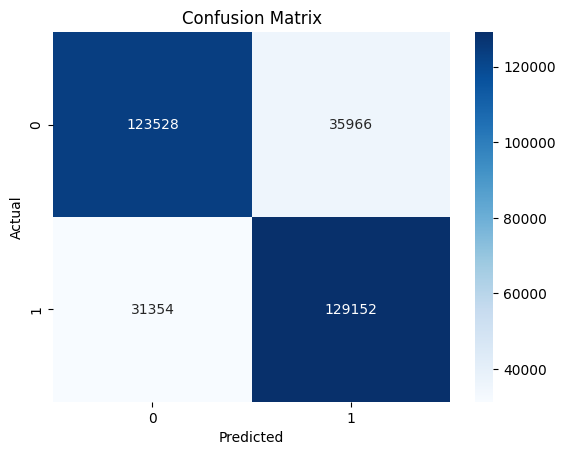

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred = model.predict(X_test_vec)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 9. Visualize Data and Model Performance
Additional graphs to better understand the dataset and model results.

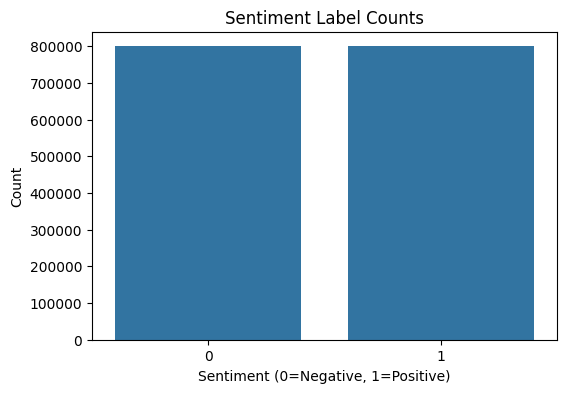

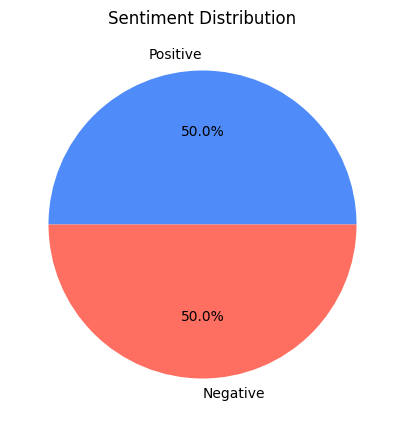

In [12]:
# Bar plot of sentiment label counts
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Label Counts')
plt.xlabel('Sentiment (0=Negative, 1=Positive)')
plt.ylabel('Count')
plt.show()

# Pie chart of sentiment distribution
plt.figure(figsize=(5,5))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Positive','Negative'], colors=['#4F8BF9','#FF6F61'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

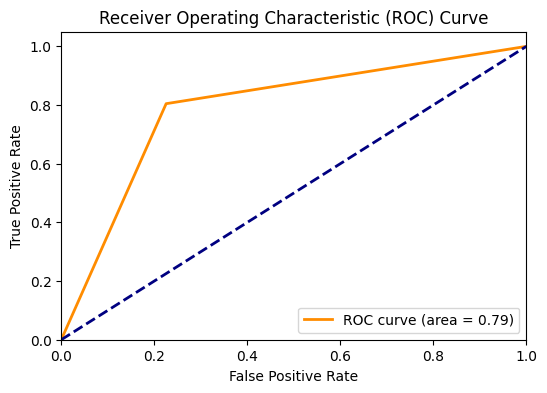

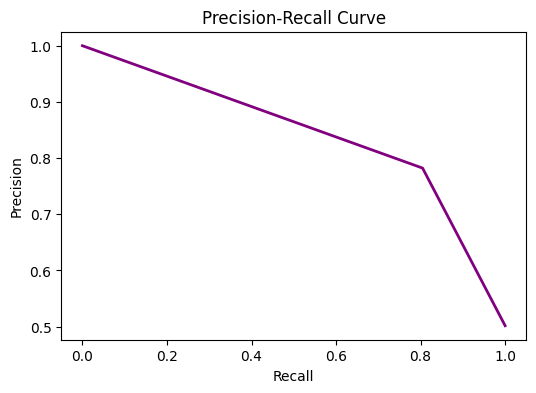

In [13]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Word Cloud of Tweets
Visualize the most frequent words in the tweets using a word cloud.

In [ ]:
# If not installed, run: pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all clean tweets into one string
text_all = ' '.join(df['clean_text'].dropna().values)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(text_all)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()